# Mask R-CNN Demo / Scooter's Turn



# **Google Drive/GitHub Initialization**

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

**Install Google Fuse Drive**

In [2]:
!ls
!mkdir -p drive
!google-drive-ocamlfuse drive

adc.json					 sample_data
google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb  wget-log


**Fetch Data from Google Drive into Google Cloud VM**

In [3]:
!ls /content/drive/DeepLearningScooter
!mkdir -p /content/DeepLearningScooter
!cp -r /content/drive/DeepLearningScooter/*.* /content/DeepLearningScooter
!cp -r /content/drive/DeepLearningScooter/Ride.mp4 /content/DeepLearningScooter/Ride.mp4
!ls /content/DeepLearningScooter

AR- CV Puzzle.pdf	  Frames.py.odt
ContoursCropImage.py.odt  mask_rcnn_scooter_0001.h5
CropImages.py.odt	  mask_rcnn_scooter_0006.h5
ExtractImages.py.odt	  Ride.mp4
FindCountours.py.odt	  train_via_region_data.odt
frame210.jpg		  validation_via_region_data.odt
AR- CV Puzzle.pdf	  Frames.py.odt
ContoursCropImage.py.odt  mask_rcnn_scooter_0001.h5
CropImages.py.odt	  mask_rcnn_scooter_0006.h5
ExtractImages.py.odt	  Ride.mp4
FindCountours.py.odt	  train_via_region_data.odt
frame210.jpg		  validation_via_region_data.odt


**Download Code from Git**

In [59]:
import os
os.chdir('/content/DeepLearningScooter')
!rm -rf mask_rcnn
!git clone https://github.com/dhirajnitk/mask_rcnn.git  
!ls /content/DeepLearningScooter

Cloning into 'mask_rcnn'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 50 (delta 1), reused 50 (delta 1), pack-reused 0
Unpacking objects: 100% (50/50), done.
AR- CV Puzzle.pdf	  mask_rcnn
ContoursCropImage.py.odt  mask_rcnn_scooter_0001.h5
CropImages.py.odt	  mask_rcnn_scooter_0006.h5
Cropped			  Ride.mp4
ExtractImages.py.odt	  train_via_region_data.odt
FindCountours.py.odt	  UnCropped
frame210.jpg		  validation_via_region_data.odt
Frames.py.odt


# **Data Acquisition from Video**

In [5]:
!pip install natsort
!pip install glob3
os.chdir('/content/DeepLearningScooter') 
!mkdir -p Cropped
!mkdir -p UnCropped
import numpy as np
import cv2
import glob
#Open the video file
!ls .
video = cv2.VideoCapture("Ride.mp4")
 # Find OpenCV version
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
 
# With webcam get(CV_CAP_PROP_FPS) does not work.
# Let's see for ourselves.
 
if int(major_ver)  < 3 :
    fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
    total = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    print("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
    print("Total no of frames from  video.get(cv2.cv.CAP_PROP_FRAME_COUNT): {0}".format(total))
else :
    fps = video.get(cv2.CAP_PROP_FPS)
    total = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
    print("Total no of frames from  video.get(cv2.CAP_PROP_FRAME_COUNT): {0}".format(total))

current = 0
count = 0
jump = 10
# loop over the frames of the video
while current < total:
    # grab the current frame
    (grabbed, frame) = video.read()
 
    # check to see if we have reached the end of the
    # video
    if not grabbed:
        break

    # increment the total number of frames read
    current+=jump
    video.set(1,current); # Where frame_no is the frame you want
    cv2.imwrite("UnCropped/frame%d.jpg" % count, frame)     # save frame as JPEG file
    count += 1

video.release()
from natsort  import natsorted
height = 360
widght = 480
start_y = 120
count = 0
for img in natsorted(glob.glob("UnCropped/*.jpg")):
    cv_img = cv2.imread(img)
    crop_img = cv_img[start_y:]
    cv2.imwrite("Cropped/frame%d.jpg" % count, crop_img)     # save frame as JPEG file
    count += 1


  Running setup.py bdist_wheel for glob3 ... - done
  Stored in directory: /root/.cache/pip/wheels/5c/db/36/aae4683ac0ba95eb154510b48d6bda87fbaac71b6a9b62123d
Successfully built glob3
AR- CV Puzzle.pdf	  mask_rcnn
ContoursCropImage.py.odt  mask_rcnn_scooter_0001.h5
CropImages.py.odt	  mask_rcnn_scooter_0006.h5
Cropped			  Ride.mp4
ExtractImages.py.odt	  train_via_region_data.odt
FindCountours.py.odt	  UnCropped
frame210.jpg		  validation_via_region_data.odt
Frames.py.odt
Frames per second using video.get(cv2.CAP_PROP_FPS) : 29.97002997002997
Total no of frames from  video.get(cv2.CAP_PROP_FRAME_COUNT): 23217


# **Training**

In [18]:

import os
os.chdir("/content/DeepLearningScooter/mask_rcnn")
!python3 custom.py train --dataset=customImages --weights=coco

AR- CV Puzzle.pdf	  FindCountours.py.odt	mask_rcnn_scooter_0001.h5
ContoursCropImage.py.odt  frame210.jpg		Ride.mp4
CropImages.py.odt	  Frames.py.odt		train_via_region_data.odt
Cropped			  mask_rcnn		UnCropped
ExtractImages.py.odt	  Mask_RCNN		validation_via_region_data.odt
Using TensorFlow backend.
Weights:  coco
Dataset:  customImages
Logs:  /content/DeepLearningScooter/mask_rcnn/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAG

In [6]:
!cp /content/DeepLearningScooter/mask_rcnn/logs/scooter20180928T0151/mask_rcnn_scooter_0006.h5 /content/drive/DeepLearningScooter
#!cp  /content/DeepLearningScooter/mask_rcnn/logs/scooter20180927T1842/mask_rcnn_scooter_0001.h5 /content/drive/DeepLearningScooter
#!find  /content/DeepLearningScooter/mask_rcnn/logs -name *.h5

cp: cannot stat '/content/DeepLearningScooter/mask_rcnn/logs/scooter20180928T0151/mask_rcnn_scooter_0006.h5': No such file or directory


In [19]:
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob
os.chdir("/content/DeepLearningScooter/mask_rcnn")
# Root directory of the project
ROOT_DIR = os.getcwd()
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import custom 

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
!cp /content/drive/DeepLearningScooter/mask_rcnn_scooter_0006.h5 /content/DeepLearningScooter/mask_rcnn/mask_rcnn_scooter_0006.h5
custom_WEIGHTS_PATH = "/content/DeepLearningScooter/mask_rcnn/mask_rcnn_scooter_0006.h5"  # TODO: update this path
config = custom.CustomConfig()
custom_DIR = os.path.join(ROOT_DIR, "customImages")
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"


def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

# Load validation dataset
dataset = custom.CustomDataset()
dataset.load_custom(custom_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [12]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
# load the last model you trained
# weights_path = model.find_last()[1]

# Load weights
!cp /content/drive/DeepLearningScooter/mask_rcnn_scooter_0006.h5 /content/DeepLearningScooter/mask_rcnn/mask_rcnn_scooter_0006.h5
#custom_WEIGHTS_PATH ="/content/DeepLearningScooter/mask_rcnn/logs/scooter20180928T0151/mask_rcnn_scooter_0006.h5"
custom_WEIGHTS_PATH ="/content/DeepLearningScooter/mask_rcnn/mask_rcnn_scooter_0006.h5"
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)
from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)


Loading weights  /content/DeepLearningScooter/mask_rcnn/mask_rcnn_scooter_0006.h5


<module 'mrcnn.visualize' from '/content/DeepLearningScooter/mask_rcnn/mrcnn/visualize.py'>

# **Results**

image ID: scooter.frame38.jpg (4) /content/DeepLearningScooter/Cropped/frame38.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  262.00000  max:  896.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool


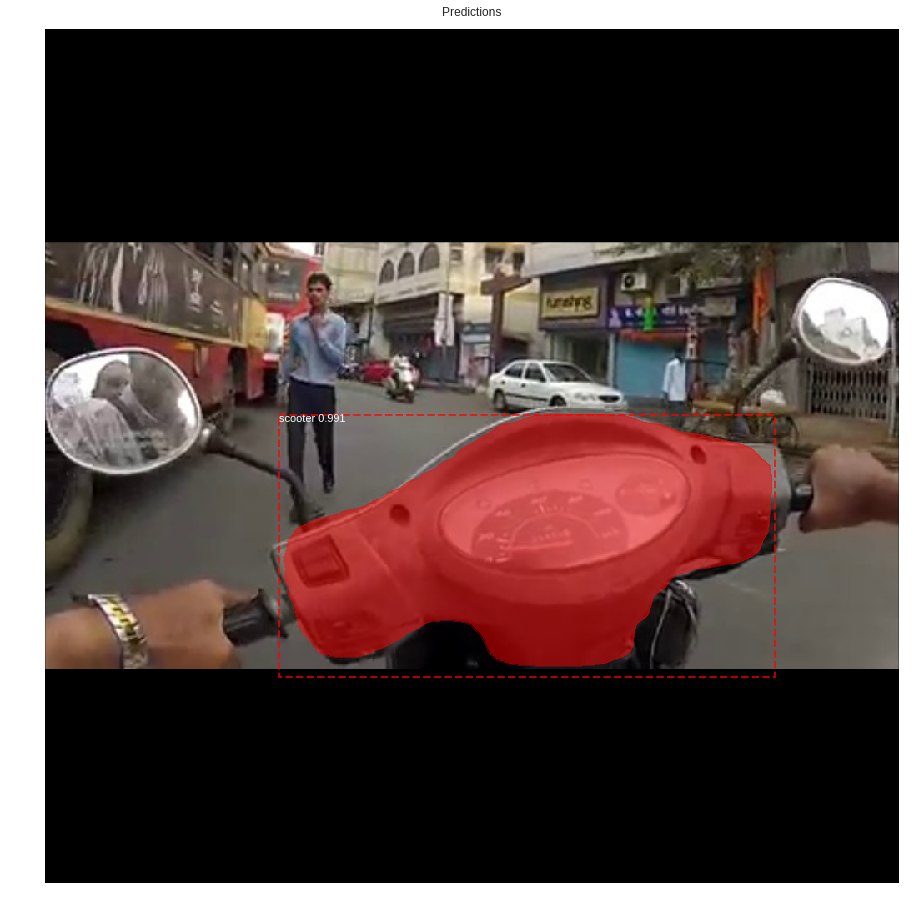

In [63]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

26
image ID: scooter.frame2230.jpg (26) /content/DeepLearningScooter/Cropped/frame2230.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  234.00000  max:  873.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool


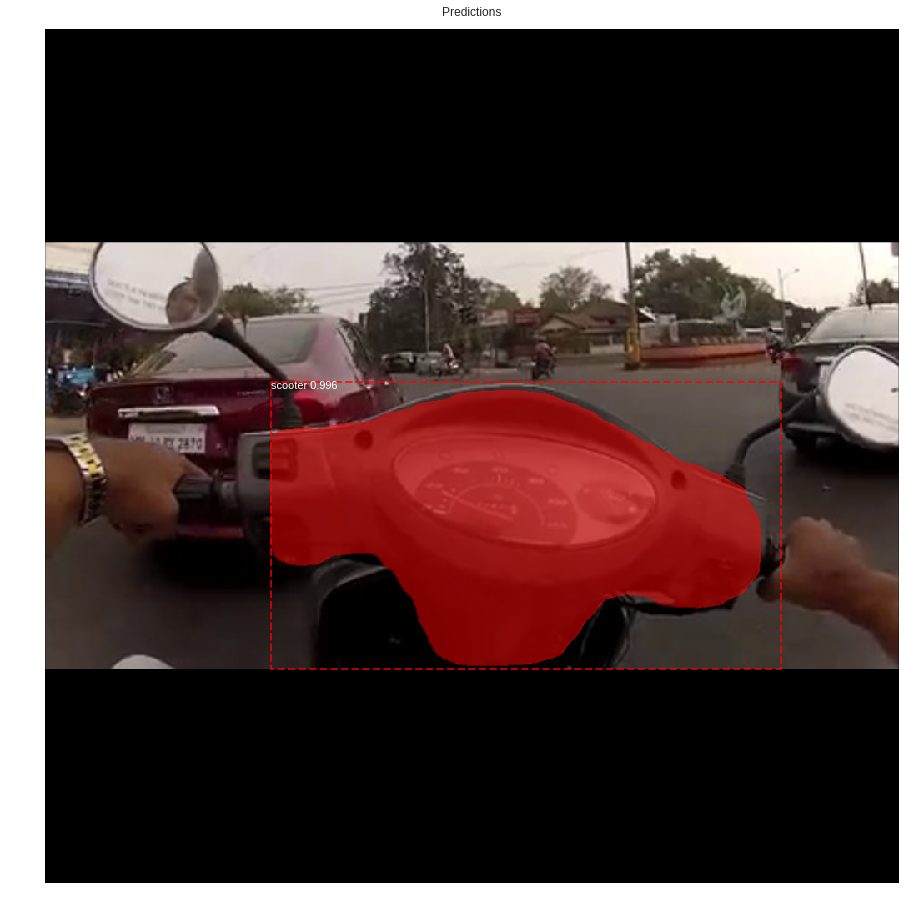

In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [24]:
os.getcwd()

'/content/DeepLearningScooter/mask_rcnn'

In [19]:
!pip install imgaug
!pip install Cython
!pip install pycocotools
!pip install -U setuptools
!pip install -U wheel
!make install -C coco/PythonAPI

    100% |████████████████████████████████| 634kB 21.3MB/s 
  Running setup.py bdist_wheel for imgaug ... - \ done
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
    100% |████████████████████████████████| 3.4MB 980kB/s 
    100% |████████████████████████████████| 1.5MB 14.2MB/s 
  Running setup.py bdist_wheel for pycocotools ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/dc/e6/36/0e1ae88c868eb42d3f92181b1c9bbd0b217a7ec3da6bd62e55
Successfully built pycocotools
    100% |████████████████████████████████| 573kB 20.6MB/s 
tensorflow 1.11.0rc2 has requirement setuptools<=39.1.0, but you'll have setuptools 40.4.3 which is incompatible.
  Found existing installation: setuptools 39.1.0
    Uninstalling setuptools-39.1.0:
      Successfully uninstalled setuptools-39.1.0
Requirement already up-to-date: wheel in /usr/local/lib/python3.6/dist-packages (0.31.1)
make: *** coco/PythonA

## Run Object Detection

frame2159.jpg
Processing 1 images
image                    shape: (240, 480, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


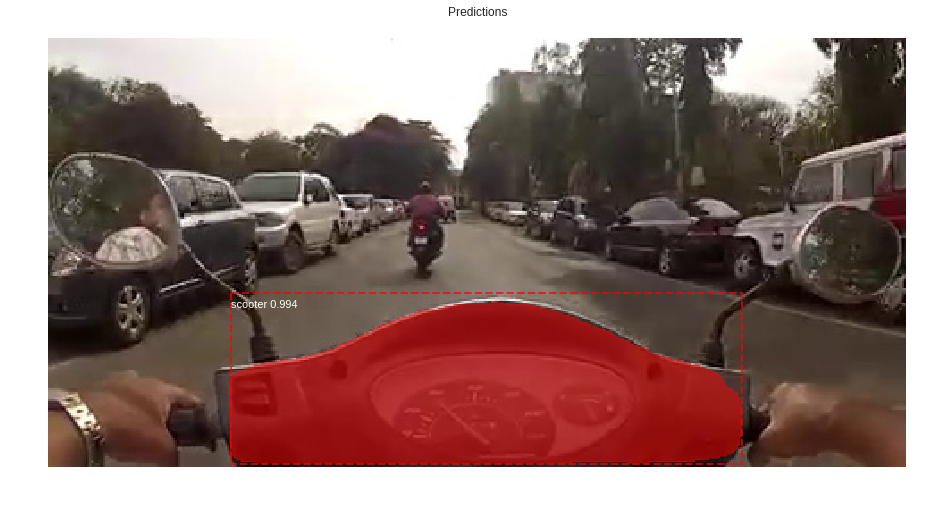

In [7]:
IMAGE_DIR = "/content/DeepLearningScooter/Cropped"
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
file_name = random.choice(file_names)
print(file_name)
image = skimage.io.imread(os.path.join(IMAGE_DIR, file_name))
# Run detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")

frame688.jpg
Processing 1 images
image                    shape: (240, 480, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


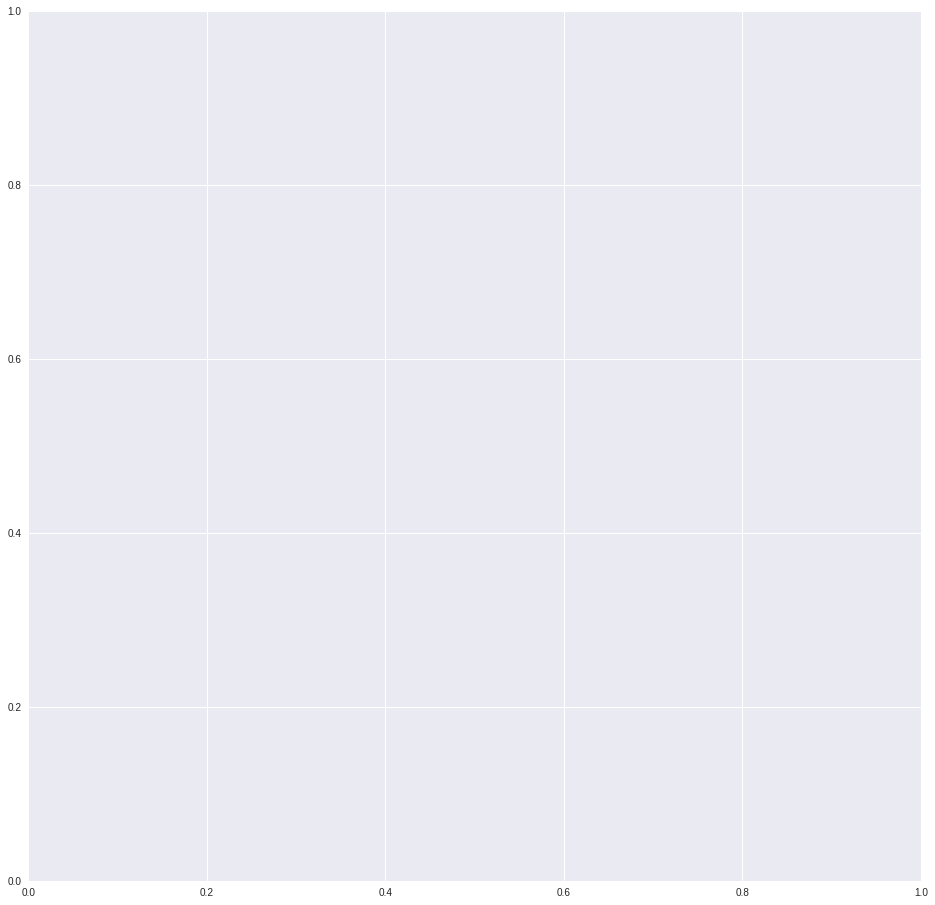

In [20]:
IMAGE_DIR = "/content/DeepLearningScooter/Cropped"
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
file_name = random.choice(file_names)
print(file_name)
image = skimage.io.imread(os.path.join(IMAGE_DIR, file_name))
# Run detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
#print(r['masks'])
#visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'], ax=ax,title="Predictions")

# **Mask Contours**

115200
uint8
(240, 480, 1)


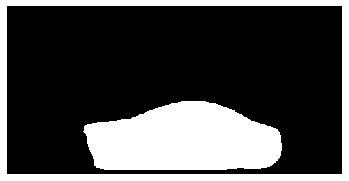

In [9]:
print(r['masks'].size)
print(r['masks'].dtype)
r['masks'].dtype='uint8'
print(r['masks'].shape)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(r['masks']),cmap='gray')

Processing 1 images
image                    shape: (240, 480, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (240, 480, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (240, 480, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.1

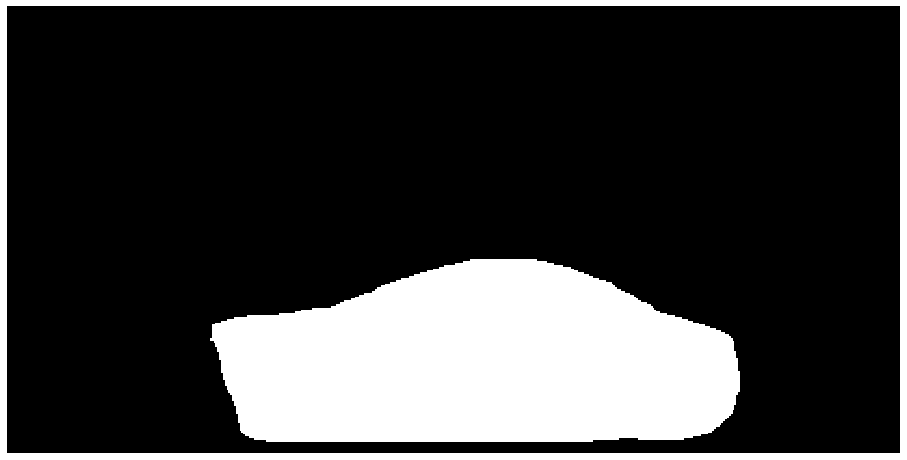

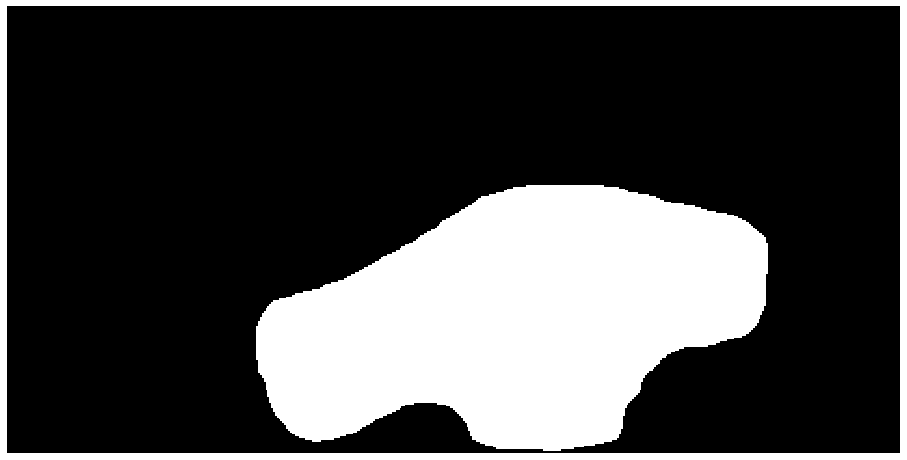

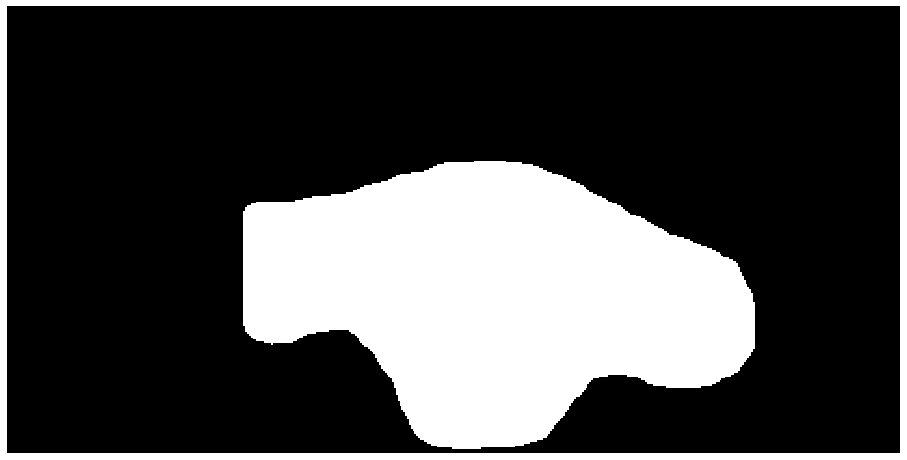

In [21]:
#221
image = '/content/DeepLearningScooter/Cropped/frame221.jpg'
image = skimage.io.imread(os.path.join(IMAGE_DIR, image))
# Run detection
results = model.detect([image], verbose=1)
# Display results
ax = get_ax(1)
r = results[0]
r['masks'].dtype='uint8'
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(r['masks']),cmap='gray')

#38
image = '/content/DeepLearningScooter/Cropped/frame38.jpg'
image = skimage.io.imread(os.path.join(IMAGE_DIR, image))
# Run detection
results = model.detect([image], verbose=1)
# Display results
ax = get_ax(1)
r = results[0]
r['masks'].dtype='uint8'
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(r['masks']),cmap='gray')


#2230
image = '/content/DeepLearningScooter/Cropped/frame2230.jpg'
image = skimage.io.imread(os.path.join(IMAGE_DIR, image))
results = model.detect([image], verbose=1)
# Display results
ax = get_ax(1)
r = results[0]
r['masks'].dtype='uint8'
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(r['masks']),cmap='gray')

# **Orientation Calculation**

115200
((263.476318359375, 156.53318786621094), (140.20462036132812, 264.7546691894531), 96.9879150390625)


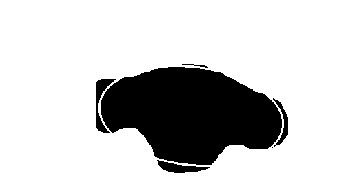

In [35]:
#2230
image = '/content/DeepLearningScooter/Cropped/frame2230.jpg'
image = skimage.io.imread(os.path.join(IMAGE_DIR, image))
results = model.detect([image], verbose=1)
# Display results
ax = get_ax(1)
r = results[0]
r['masks'].dtype='uint8'
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(r['masks']),cmap='gray')
print(r['masks'].size)
(_,contours,_) = cv2.findContours(r['masks'].copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
ellipse = cv2.fitEllipse(cnt)
print(ellipse)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(cv2.ellipse(r['masks'].copy(),ellipse,(0,255,0),2)))

Processing 1 images
image                    shape: (240, 480, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
115200
((274.7154846191406, 167.39344787597656), (127.4701156616211, 272.0159606933594), 77.23358917236328)


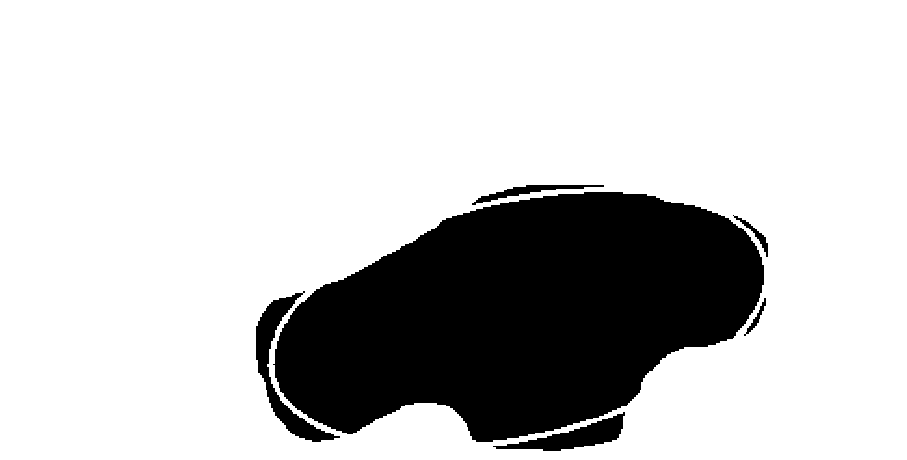

In [16]:
#38
image = '/content/DeepLearningScooter/Cropped/frame38.jpg'
image = skimage.io.imread(os.path.join(IMAGE_DIR, image))
results = model.detect([image], verbose=1)
# Display results
ax = get_ax(1)
r = results[0]
r['masks'].dtype='uint8'
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(r['masks']),cmap='gray')
print(r['masks'].size)
(_,contours,_) = cv2.findContours(r['masks'].copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
ellipse = cv2.fitEllipse(cnt)
print(ellipse)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(cv2.ellipse(r['masks'].copy(),ellipse,(0,255,0),2)))

Processing 1 images
image                    shape: (240, 480, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
115200
(240, 480, 3)
((251.8299560546875, 197.1823272705078), (110.92648315429688, 282.2453918457031), 89.0435562133789)


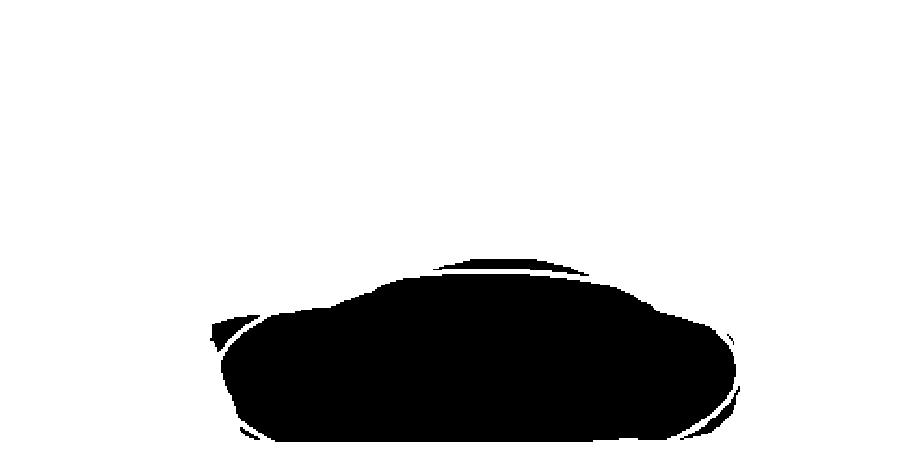

In [26]:
#221
image = '/content/DeepLearningScooter/Cropped/frame221.jpg'
image = skimage.io.imread(os.path.join(IMAGE_DIR, image))
results = model.detect([image], verbose=1)
# Display results
ax = get_ax(1)
r = results[0]
r['masks'].dtype='uint8'
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(r['masks']),cmap='gray')
print(r['masks'].size)
print(image.shape)
(_,contours,_) = cv2.findContours(r['masks'].copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
ellipse = cv2.fitEllipse(cnt)
print(ellipse)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(cv2.ellipse(r['masks'].copy(),ellipse,(0,255,0),2)))

# ** Inference for Full Video with Text labelling**

In [60]:
# Inference Code
IMAGE_DIR = "/content/DeepLearningScooter/Cropped"
os.chdir("/content/DeepLearningScooter/mask_rcnn")
!cp /content/drive/DeepLearningScooter/mask_rcnn_scooter_0006.h5 /content/DeepLearningScooter/mask_rcnn/mask_rcnn_scooter_0006.h5
!python3 custom.py direction --weights=/content/DeepLearningScooter/mask_rcnn/mask_rcnn_scooter_0006.h5 --video=/content/DeepLearningScooter/Ride.mp4

Using TensorFlow backend.
Weights:  /content/DeepLearningScooter/mask_rcnn/mask_rcnn_scooter_0006.h5
Dataset:  None
Logs:  /content/DeepLearningScooter/mask_rcnn/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss

In [62]:
!ls -lht 

!cp *.mp4 /content/drive/DeepLearningScooter

total 806M
-rw-r--r-- 1 root root 562M Sep 29 23:11 Direction_20180929T222356.mp4
drwxr-xr-x 3 root root 4.0K Sep 29 22:23 logs
-rw-r--r-- 1 root root 245M Sep 29 22:23 mask_rcnn_scooter_0006.h5
-rw-r--r-- 1 root root 2.5K Sep 29 22:17 setup.py
drwxr-xr-x 6 root root 4.0K Sep 29 22:17 samples
drwxr-xr-x 3 root root 4.0K Sep 29 22:17 mrcnn
-rw-r--r-- 1 root root  119 Sep 29 22:17 requirements.txt
drwxr-xr-x 4 root root 4.0K Sep 29 22:17 customImages
-rw-r--r-- 1 root root  15K Sep 29 22:17 custom.py
drwxr-xr-x 2 root root 4.0K Sep 29 22:17 __pycache__
-rw-r--r-- 1 root root   57 Sep 29 22:17 README.md
